<a href="https://colab.research.google.com/github/Nithilaa/WebAnalytics_minipackage_18PD22/blob/main/WebAnalytics_dataviz_18PD22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING THE NECESSARY LIBRARIES

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATASET ( I've uploaded the dataset in github, and then used it here)

In [151]:
url = 'https://raw.githubusercontent.com/Nithilaa/KAG_conversion_data_WebAnalytics/main/KAG_conversion_data.csv'
dataset = pd.read_csv(url)

In [152]:
dataset.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# RENAMING COLUMN NAMES (for my convenience)

In [153]:
dataset = dataset.rename(columns = {'ad_id':'ad_id', 'xyz_campaign_id':'comp_camp_id', 'fb_campaign_id':'fb_camp_id', 'age':'age', 'gender':'gender', 'interest':'interest', 
                          'Impressions':'impression', 'Clicks':'clicks', 'Spent':'amt_spent', 'Total_Conversion':'tot_conversion', 'Approved_Conversion':'approved_conversion'})

In [154]:
dataset.head()

,ad_id,comp_camp_id,fb_camp_id,age,gender,interest,impression,clicks,amt_spent,tot_conversion,approved_conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# WHAT IS MY OBJECTIVE HERE?

I've planned to optimize sales conversions and predicting future sales.

My approach is to start with **Exploratory Data Analysis (EDA)** and then try to train my model using a few Machine Learning algorithms.

# PRE PROCESSING THE DATASET

In [155]:
dataset.shape

(1143, 11)

The dataset has 1143 rows and 11 columns.

In [156]:
dataset.columns

Index(['ad_id', 'comp_camp_id', 'fb_camp_id', 'age', 'gender', 'interest',
       'impression', 'clicks', 'amt_spent', 'tot_conversion',
       'approved_conversion'],
      dtype='object')

In [157]:
dataset.dtypes

ad_id                    int64
comp_camp_id             int64
fb_camp_id               int64
age                     object
gender                  object
interest                 int64
impression               int64
clicks                   int64
amt_spent              float64
tot_conversion           int64
approved_conversion      int64
dtype: object

Check if there are any null values

In [158]:
dataset.isnull().sum()

ad_id                  0
comp_camp_id           0
fb_camp_id             0
age                    0
gender                 0
interest               0
impression             0
clicks                 0
amt_spent              0
tot_conversion         0
approved_conversion    0
dtype: int64

# DESCRIBING THE DATASET VARIABLES

In [159]:
dataset.info

<bound method DataFrame.info of         ad_id  comp_camp_id  ...  tot_conversion approved_conversion
0      708746           916  ...               2                   1
1      708749           916  ...               2                   0
2      708771           916  ...               1                   0
3      708815           916  ...               1                   0
4      708818           916  ...               1                   1
...       ...           ...  ...             ...                 ...
1138  1314410          1178  ...              13                   2
1139  1314411          1178  ...               3                   0
1140  1314412          1178  ...               2                   0
1141  1314414          1178  ...               8                   2
1142  1314415          1178  ...               5                   2

[1143 rows x 11 columns]>

    1) ad_id: an unique ID for each ad.

    2) comp_camp_id: an ID associated with each ad campaign of XYZ company.

    3) fb_camp_id: an ID associated with how Facebook tracks each campaign.

    4) age: age of the person to whom the ad is shown.

    5) gender: gender of the person to whim the add is shown

    6) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).
    
    7) impression: the number of times the ad was shown.

    8) clicks: number of clicks on for that ad.

    9) amt_spent: Amount paid by company xyz to Facebook, to show that ad.

    10) tot_conversion: Total number of people who enquired about the product after seeing the ad.

    11) approved_conversion: Total number of people who bought the product after seeing the ad.

# EXPLORATORY DATA ANALYSIS

In [160]:
dataset["age"].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

In [161]:
dataset["tot_conversion"].value_counts()

1     666
2     162
3      78
4      61
5      41
6      22
7      16
11     13
8      13
13      9
0       8
10      8
9       7
22      4
17      4
16      4
14      4
12      4
23      3
26      2
31      2
20      2
60      1
40      1
18      1
19      1
21      1
24      1
28      1
30      1
38      1
15      1
Name: tot_conversion, dtype: int64

In [162]:
dataset["approved_conversion"].value_counts()

0     559
1     403
2      86
3      35
4      24
6       7
5       7
8       5
10      4
7       4
9       3
14      2
21      1
17      1
13      1
12      1
Name: approved_conversion, dtype: int64

1. CORRELATION MATRIX USING HEATMAPS

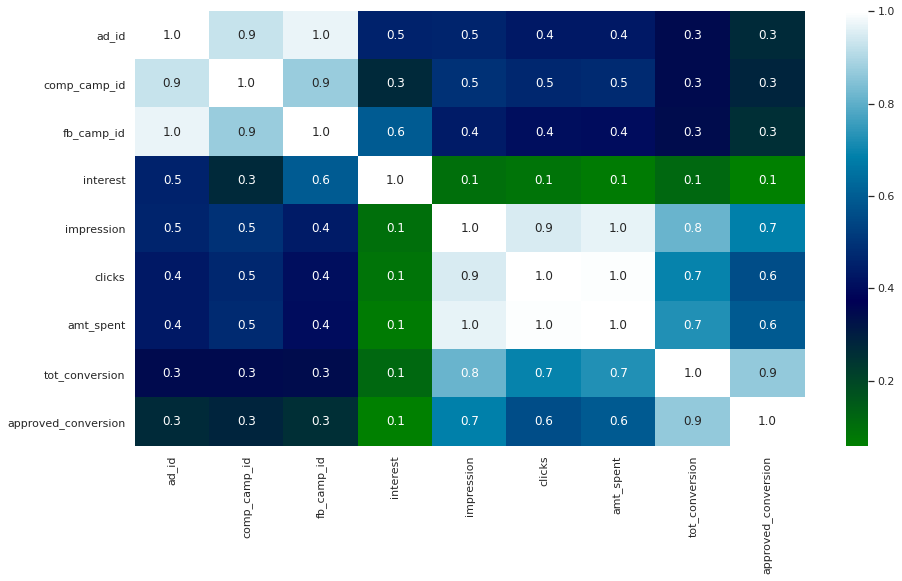

In [163]:
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(dataset.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="ocean")

INSIGHTS FROM THIS PLOT : 

    We get great correlation between amount spent and the number of clicks or impressions. 
    
    Which is followed by a good amount of correlation between impressions and total conversion or approved conversion. 
    
    And we can see that maximum number of conversions has turned into Approved conversions. 
    
    That's something very positive. 

2. LET'S CHECK IF WE CAN GET ANY INSIGHT FROM RELATION OF AGE WITH OTHER COLUMNS

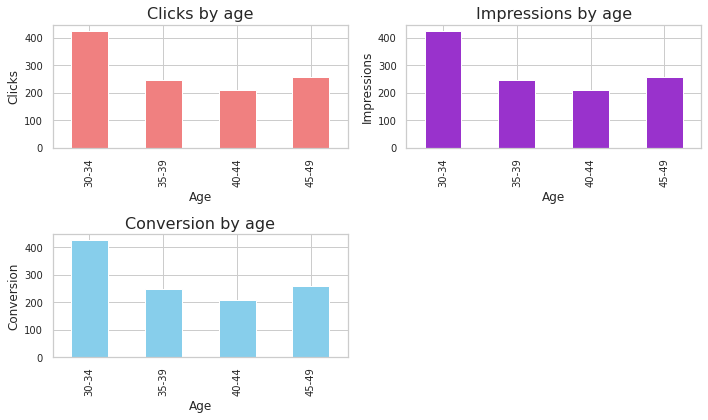

In [164]:
cba = dataset.groupby("age")["clicks"].count() #Clicks per age group
Iba = dataset.groupby("age")["impression"].count() #Impressions per age group
conv_age = dataset.groupby("age")["tot_conversion"].count() #Conversions per age group

plt.subplot(221)
ax = cba.plot(kind='bar', figsize=(10,6), color="lightcoral", fontsize=10)
ax.set_title("Clicks by age", fontsize=16)
ax.set_xlabel("Age", fontsize=12);
ax.set_ylabel("Clicks", fontsize=12);

plt.subplot(222)
ix = Iba.plot(kind='bar', figsize=(10,6), color="darkorchid", fontsize=10)
ix.set_title("Impressions by age", fontsize=16)
ix.set_xlabel("Age", fontsize=12);
ix.set_ylabel("Impressions", fontsize=12);

plt.subplot(223)
bx = conv_age.plot(kind='bar', figsize=(10,6), color="skyblue", fontsize=10)
bx.set_title("Conversion by age", fontsize=16)
bx.set_xlabel("Age", fontsize=12);
bx.set_ylabel("Conversion", fontsize=12);

plt.tight_layout()
plt.show()

INSIGHTS FROM THIS PLOT : 

    The number of clicks, impressions as well as conversions are maximum in case of the age-group 30-34 and the least in case of 40-44 age-group. 
    Hence the campaign may be the most focused on the age group of 30-34.

3. COMPARING GENDER AND APPROVED CONVERSIONS

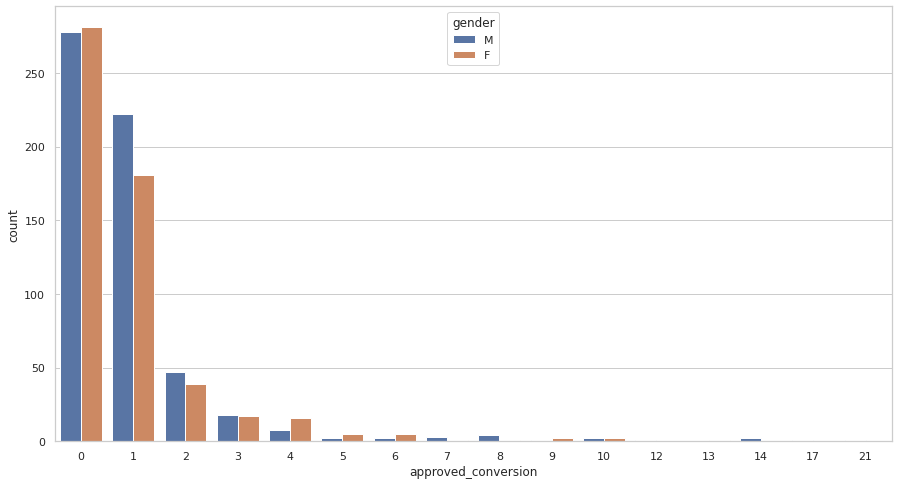

In [165]:
f,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x='approved_conversion',hue='gender',data=dataset)

INSIGHTS FROM THIS PLOT :

    It is quite evident that more men have bought the product after seeing the ad.
    So, a man buying the product after ad is more probable than a woman.

4. EXPLORING THE CAMPAIGNS

In [166]:
dataset["comp_camp_id"].unique()

array([ 916,  936, 1178])

Here, we see there are 3 different ad campaigns for the given company.

Now we'll replace their names with comp_A, comp_B and comp_C for better visualisation.



In [167]:
dataset["comp_camp_id"].replace({916:"comp_A",936:"comp_B",1178:"comp_C"}, inplace=True)

In [168]:
dataset.head()

,ad_id,comp_camp_id,fb_camp_id,age,gender,interest,impression,clicks,amt_spent,tot_conversion,approved_conversion
0,708746,comp_A,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,comp_A,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,comp_A,103920,30-34,M,20,693,0,0.00,1,0
3,708815,comp_A,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,comp_A,103928,30-34,M,28,4133,1,1.29,1,1


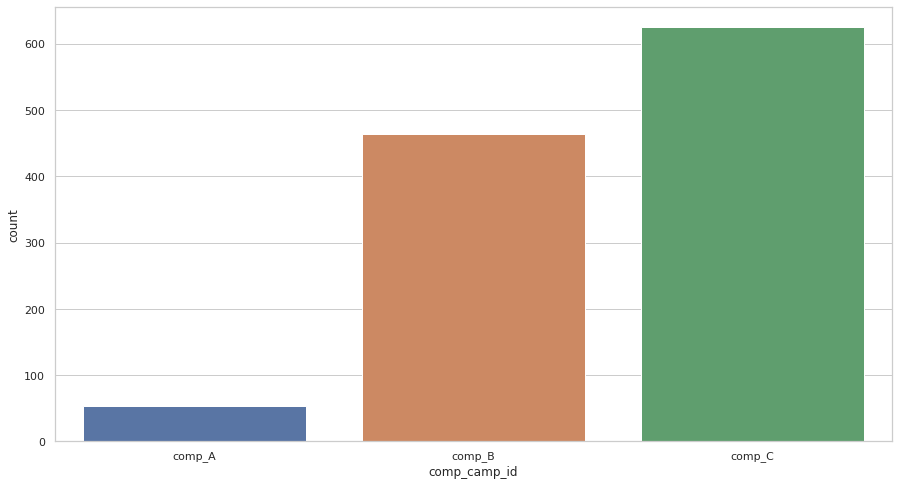

In [169]:
f,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='comp_camp_id', data = dataset) 
plt.show() 

INSIGHTS FROM THIS PLOT :

    This shows campaign of company C (1178), has most number of ads.

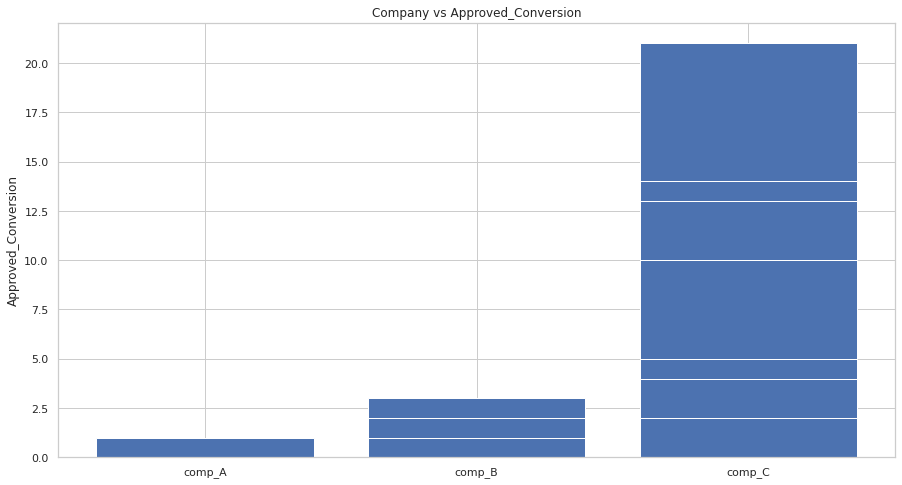

In [170]:
f,ax = plt.subplots(figsize=(15, 8))
plt.bar(dataset["comp_camp_id"], dataset["approved_conversion"])
plt.ylabel("Approved_Conversion")
plt.title("Company vs Approved_Conversion")
plt.show()

INSIGHTS FROM THIS PLOT :

    It's clear from both the above graphs that campaign of Company C has better Approved_conversion count, 
    i.e. most people bought products in campaign of Company C.

5. EXPLORING THE AGE COLUMN

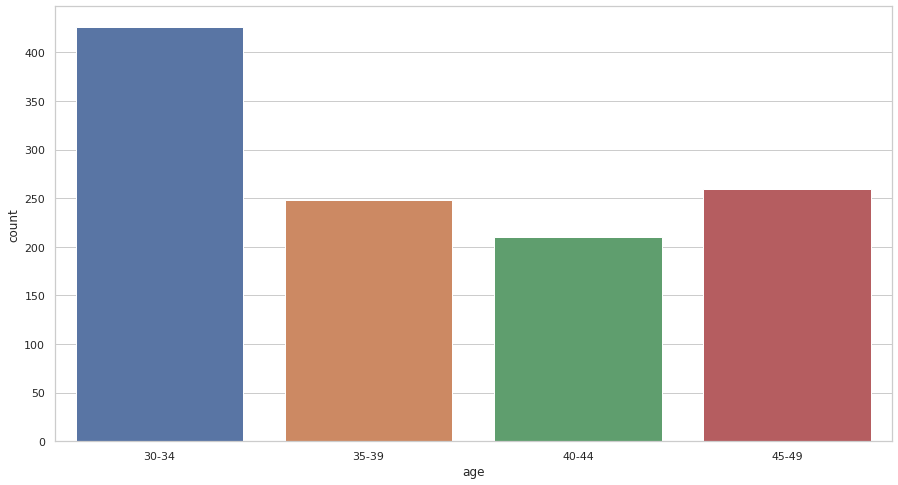

In [171]:
f,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='age', data = dataset) 
plt.show() 

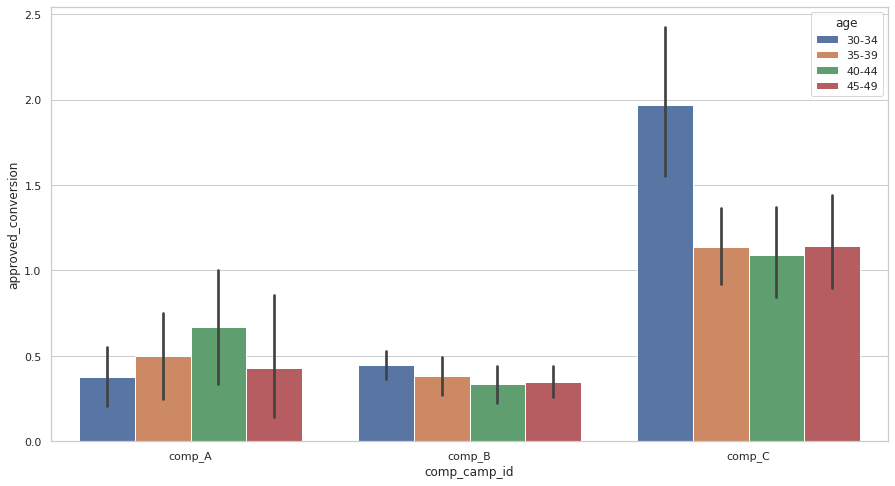

In [172]:
f,ax = plt.subplots(figsize=(15, 8))
sns.set(style="whitegrid")
sns.barplot(x=dataset["comp_camp_id"], y=dataset["approved_conversion"], hue=dataset["age"], data=dataset)

INSIGHTS FROM THIS PLOT :

    It's interesting to note that in campaign of Company C and campaign of Company B, the age group of 30-34 shows more interest.
    Whereas in campaign_a the age group of 40-44 shows more interest.


6. EXPLORING THE GENDER COLUMN

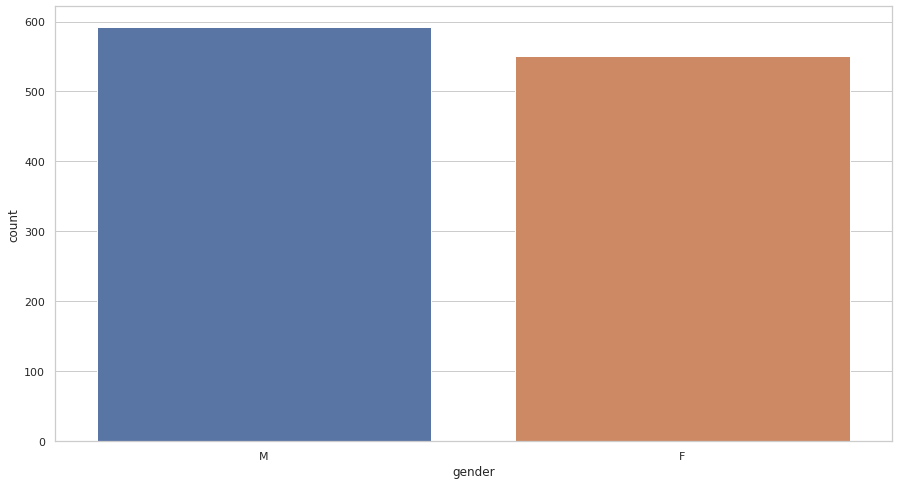

In [173]:
f,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='gender', data = dataset) 
plt.show() 

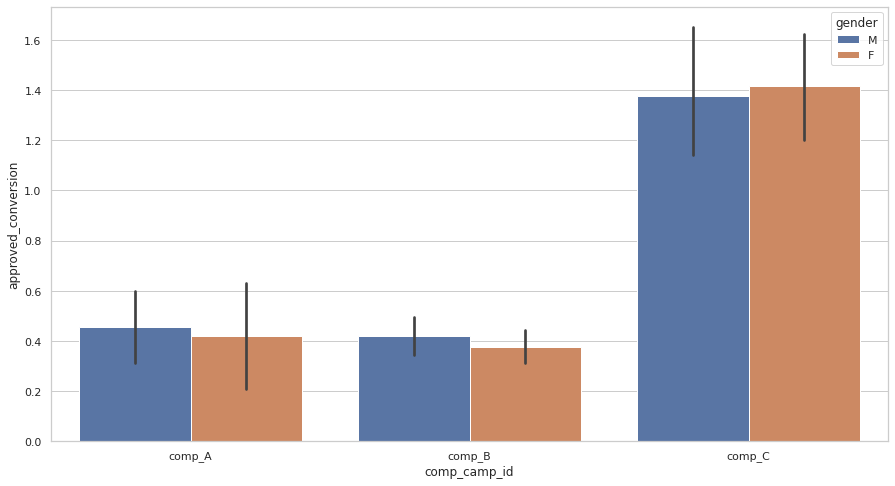

In [174]:
f,ax = plt.subplots(figsize=(15, 8))
sns.set(style="whitegrid")
sns.barplot(x=dataset["comp_camp_id"], y=dataset["approved_conversion"], hue=dataset["gender"], data=dataset)

INSIGHTS FROM THIS PLOT : 

    Both the genders shows similar interests in all three campaigns.

7. EXPLORING THE INTEREST COLUMN

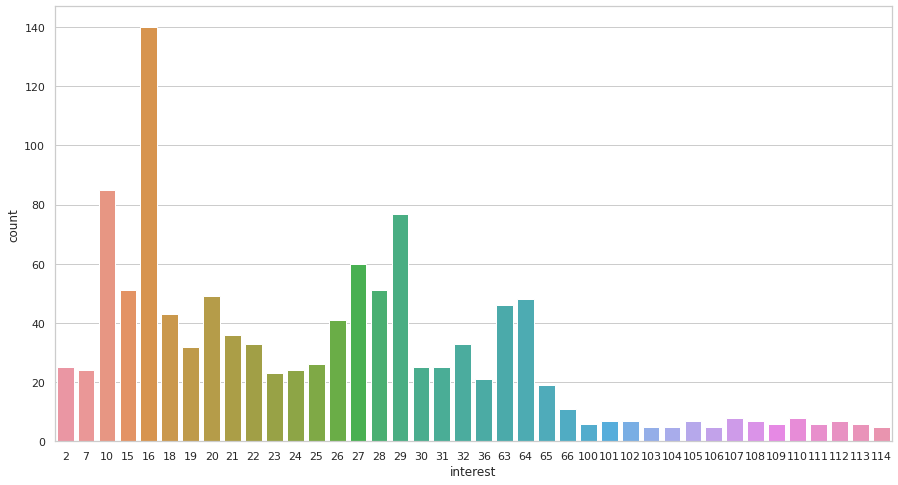

In [175]:
f,ax = plt.subplots(figsize=(15, 8))
sns.countplot(x ='interest', data = dataset) 
plt.show() 

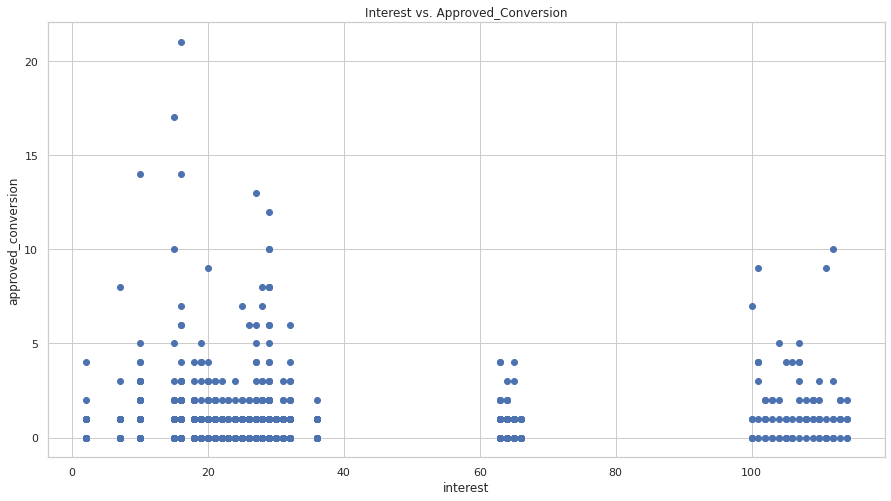

In [176]:
f,ax = plt.subplots(figsize=(15, 8))
plt.scatter(dataset["interest"], dataset["approved_conversion"])
plt.title("Interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("approved_conversion")
plt.show()

INSIGHTS FROM THIS PLOT :
    
    Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. 
    Rest of the distribution is according to what was expected.

8. CLICKS VS AGE VS GENDER

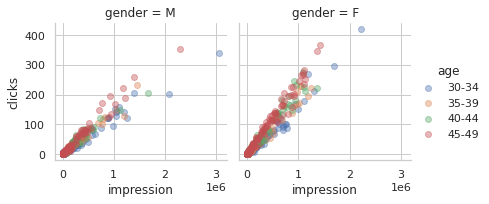

In [177]:
g = sns.FacetGrid(dataset, col="gender", hue="age")
g.map(plt.scatter, "impression", "clicks", alpha=.4)
g.add_legend();

INSIGHTS FROM THIS PLOT :

    It can be depicted that the largest age group(45-49) participated the most for clicks. 
    We can notice that the contribution of Female gender is considerably larger than that of Male gender.

9. CLICKS VS IMPRESSIONS VS AGE

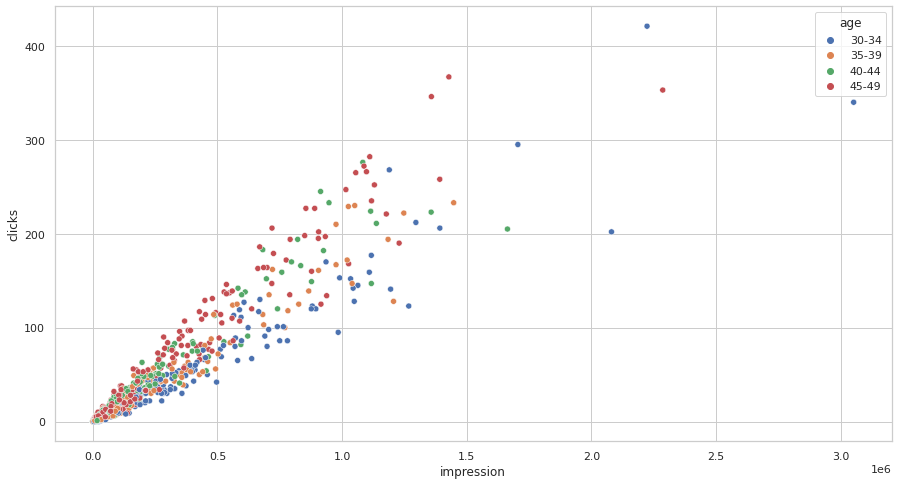

In [178]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'impression' ,y='clicks', hue='age', data=dataset)

INSIGHTS FROM THIS PLOT :

    Shows a linear relationship, with the increase in number of times the ads are shown
    Clicks on ads are also increasing.



10. EXPLORING THE INTEREST COLUMN

In [179]:
dataset['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

There are total 40 categories in which people's interest is divided.

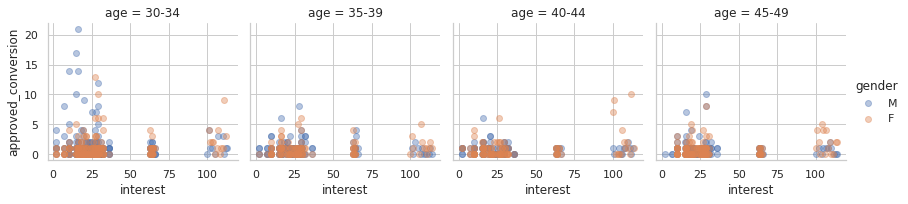

In [180]:
g = sns.FacetGrid(dataset, col="age", hue="gender")
g.map(plt.scatter, "interest", "approved_conversion", alpha=.4)
g.add_legend();

INSIGHTS FROM THIS PLOT :

    We can see higher amount of Sales between product id 0-26(for both gender)  
    Especially for age group 30-34, as men within the age of 30-34 bought highest amount of products

11. MONEY SPENT ON ADS

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.6% of the points cannot be placed; y

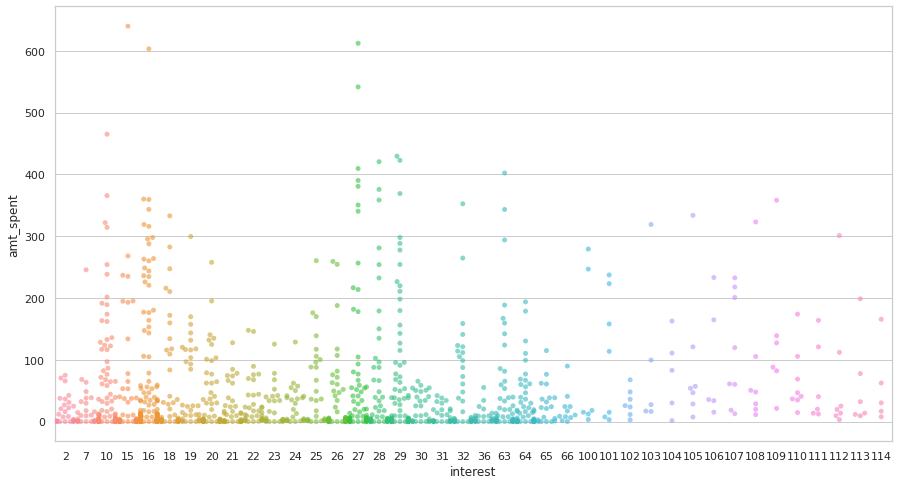

In [181]:
f,ax = plt.subplots(figsize=(15, 8))
sns.swarmplot(x = 'interest' ,y='amt_spent', data=dataset, alpha = .6)

INSIGHTS FROM THIS PLOT :

    We can see that highest amount of money spent by a company to display ads lies in the category of interests:
        10, 15, 16, 27, 28, 29 and 63

12. CAMPAIGN VS GENDER

<Figure size 1080x576 with 0 Axes>

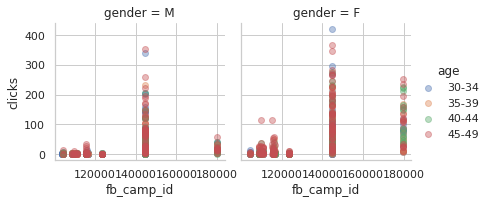

In [182]:
plt.figure(figsize=(15,8))
g = sns.FacetGrid(dataset, col="gender", hue="age")
g.map(plt.scatter, "fb_camp_id", "clicks", alpha=.4)
g.add_legend();

<Figure size 1080x576 with 0 Axes>

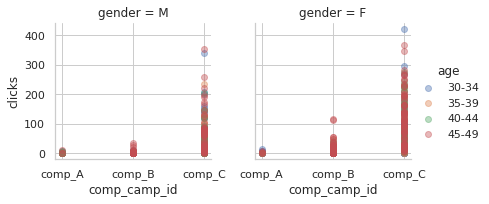

In [183]:
plt.figure(figsize=(15,8))
g = sns.FacetGrid(dataset, col="gender", hue="age")
g.map(plt.scatter, "comp_camp_id", "clicks", alpha=.4)
g.add_legend();

INSIGHTS FROM THIS PLOT :

    It shows that campaign ads from facebook and other companies had more female audience than male



13. WHO GOT MORE CLICKS FOR THEIR CAMPAIGNS ? - COMPANY CAMPAIGNS OR FACEBOOK CAMPAINGS

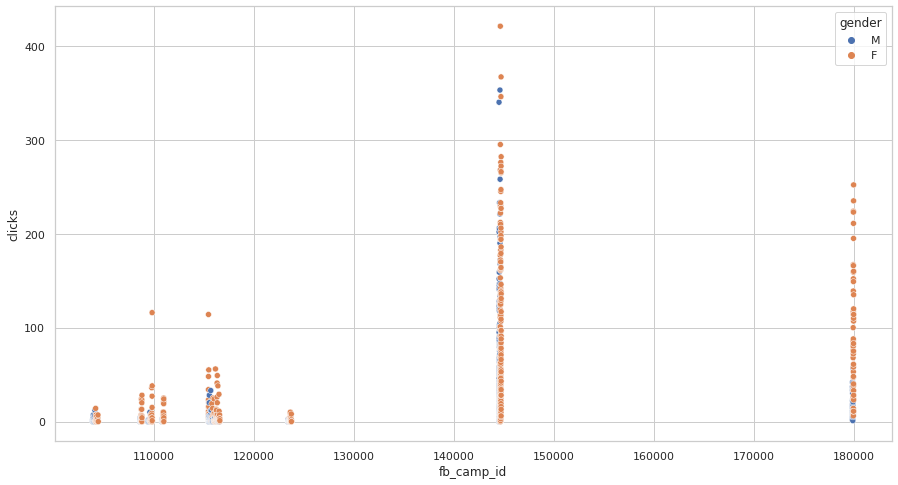

In [184]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'fb_camp_id' ,y='clicks', hue='gender', data=dataset)

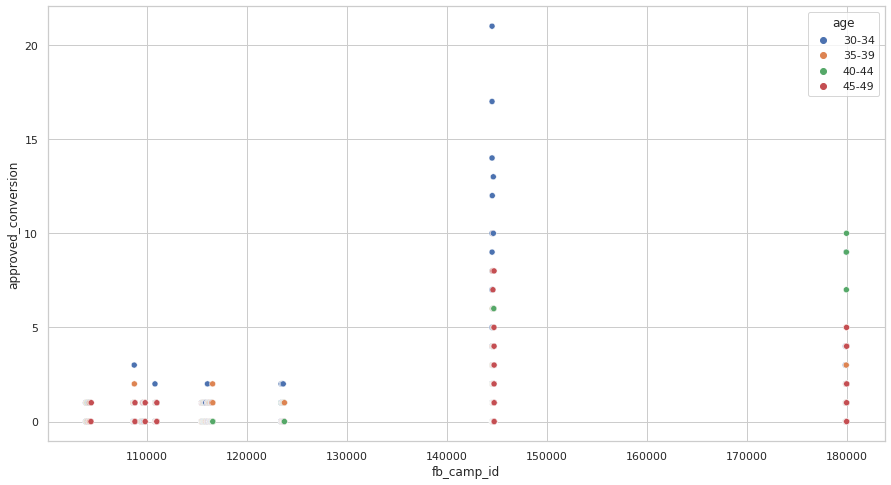

In [185]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'fb_camp_id' ,y='approved_conversion', hue='age', data=dataset)

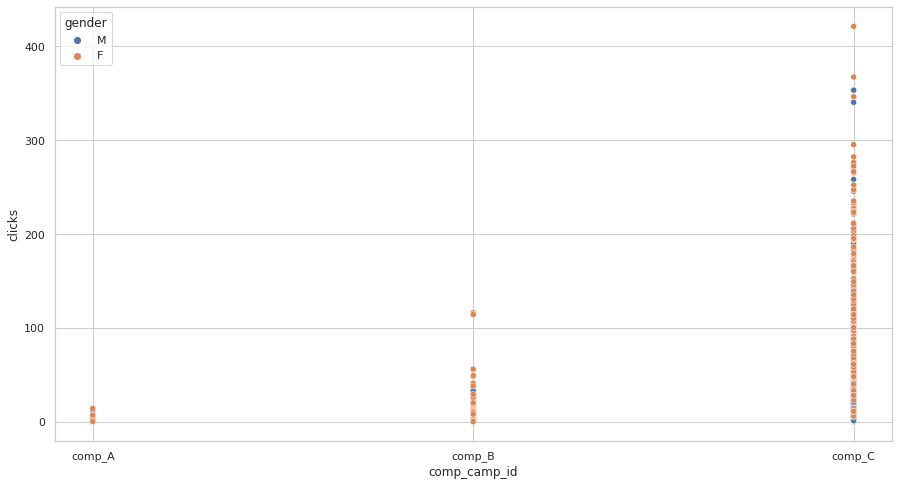

In [186]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'comp_camp_id' ,y='clicks', hue='gender', data=dataset)

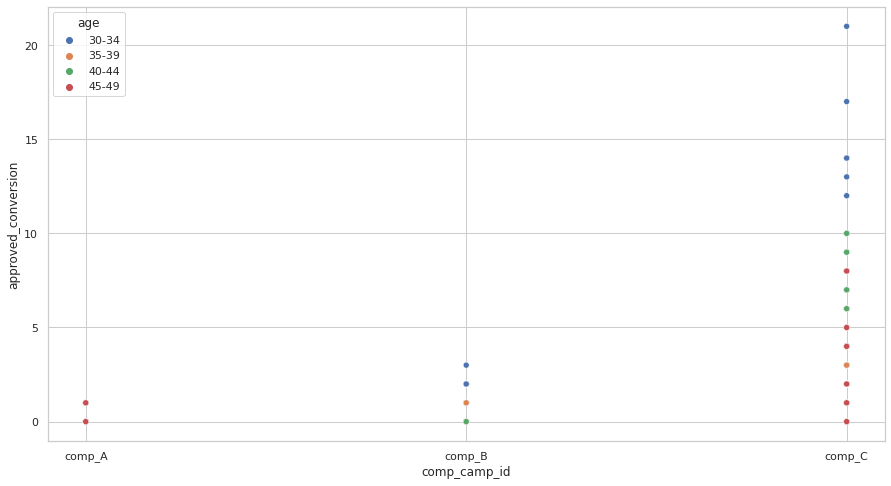

In [187]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'comp_camp_id' ,y='approved_conversion', hue='age', data=dataset)

INSIGHTS FROM THIS PLOT : 

    Both the companies got highest amount clicks from age group 45-49 and gender female.

    Clearly, facebook ads got more clicks.

14. WHO SPENT MORE ON ADS?

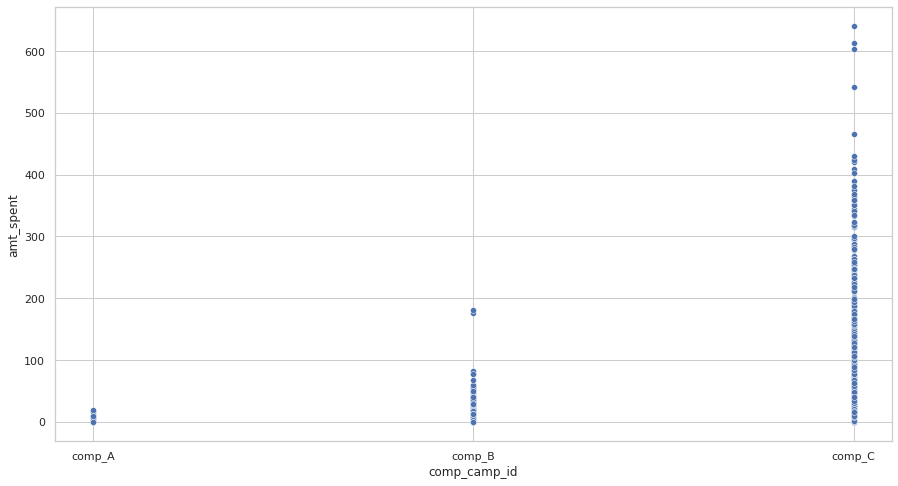

In [188]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'comp_camp_id' ,y='amt_spent', data=dataset)

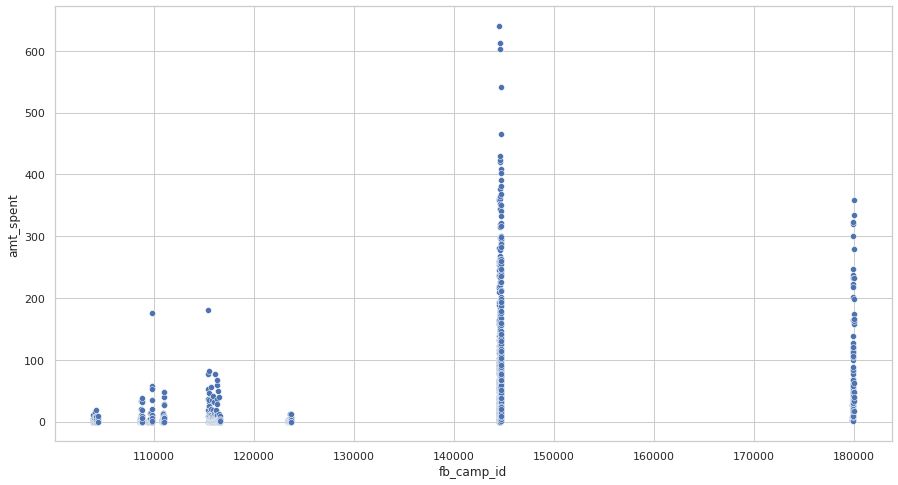

In [189]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'fb_camp_id' ,y='amt_spent', data=dataset)

INSIGHTS FROM THIS GRAPH : 

    It is explanatory that facebook spent more, as it displays more ads than other companies. 
    However, companies and facebook both has the highest expenditure on ads of as much as 630

15. WHICH CAMPAIGN PERFORMED THE BEST?

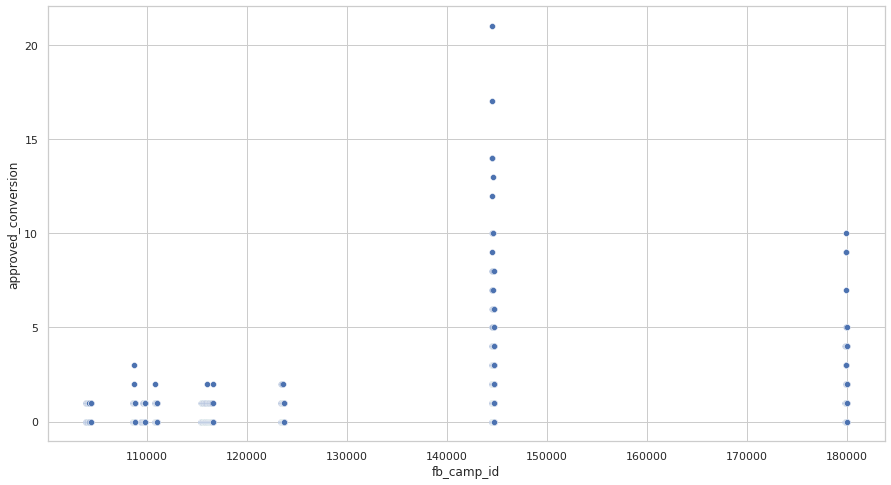

In [190]:
f,ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x = 'fb_camp_id' ,y='approved_conversion', data=dataset)

INSIGHTS FROM THIS PLOT :

    Facebook Campaign id lying between 140k - 150k performed the best by selling the product to as many as 21 people, which is the highest

# SUMMARY FROM THE ABOVE 15 EDAs

* The more impression of ads, the more likely ads will be clicked

* Most amount of sales were covered by ads lying in the interest between 0-26

* The highest amount of money(639) spent by a company to display ads lies in the category of interests: 10, 15, 16, 27, 28, 29 and 63

* It shows that campaign ads from facebook and other companies had more female audience than male

* With respect to Gender

      Women clicks more on the ads than men
      Men tends to enquire more about the product than women
      More Men tends to buy product after enquiring than women

* With respect to Age

      The age group of 35-39 showed least participation on clicking ads, enquiring about or buying the products
      The age group of 45-49 showed highest activity of clicking on ads
      The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups

* Facebook had more sales as compared to other companies

* Both the companies got highest amount clicks from age group 45-49 and gender female . Clearly, facebook ads got more clicks.

* Facebook ads were shown more

* Facebook spent more money on ads as they had more number of clicks

* For Facebook, Campaign id lying between 140k - 150k performed the best by selling the product to as many as 21 people, which is the highest. 

* For the rest of the companies(xyz), company id 1178 perfomed the best by selling the product to as many as 21 people

# K-MEANS CLUSTERING (using elbow method)

In [191]:
x = dataset.iloc[:,9:11].values

In [192]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i , init = "k-means++" , max_iter = 300, n_init = 10 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

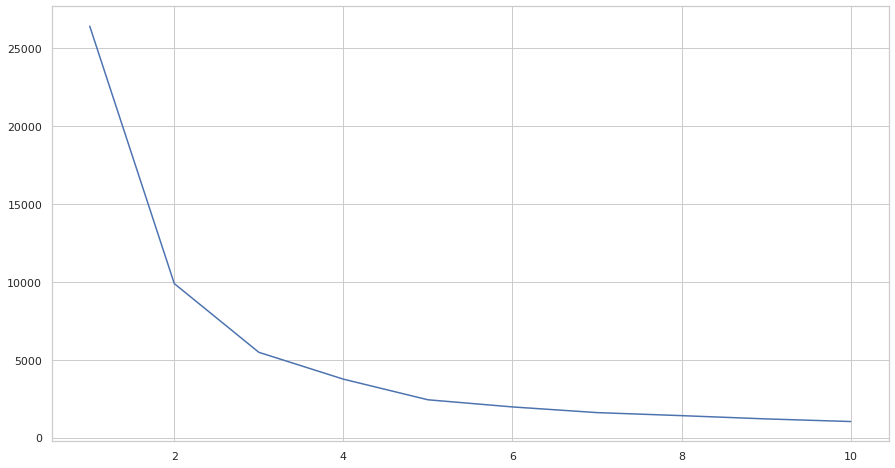

In [193]:
f,ax = plt.subplots(figsize=(15, 8))
plt.plot(range(1,11),wcss)

In [194]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)

In [195]:
y_kmeans

array([0, 0, 0, ..., 0, 2, 0], dtype=int32)

Text(0, 0.5, 'Approved_Conversion')

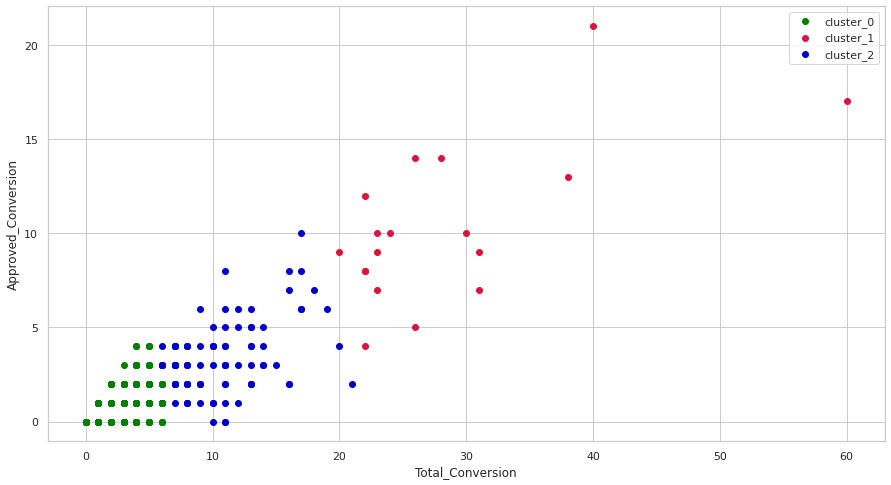

In [196]:
plt.figure(figsize=((15,8)))
plt.scatter (x = x[y_kmeans == 0,0], y = x[y_kmeans == 0,1], c = 'green', label = 'cluster_0' )
plt.scatter (x = x[y_kmeans == 1,0], y = x[y_kmeans == 1,1], c = 'crimson', label = 'cluster_1' )
plt.scatter (x = x[y_kmeans == 2,0], y = x[y_kmeans == 2,1], c = 'mediumblue', label = 'cluster_2' )
plt.legend()
plt.xlabel("Total_Conversion")
plt.ylabel("Approved_Conversion")

In [197]:
from sklearn import*
metrics.silhouette_score(x, y_kmeans, metric='euclidean')

0.7864760668656886

# LINEAR REGRESSION

In [198]:
dataset = dataset.replace('30-34',0.0011)
dataset = dataset.replace('35-39',0.0012)
dataset = dataset.replace('40-44',0.0013)
dataset = dataset.replace('45-49',0.0014)

In [199]:
dataset = dataset.replace('M',1)
dataset = dataset.replace('F',0)

In [200]:
x = dataset[['age', 'gender', 'interest', 'impression', 'clicks', 'amt_spent', 'tot_conversion']]
y = dataset['approved_conversion']

In [201]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
linear = LinearRegression()
linear.fit(x_train,y_train)
linear.score(x_test,y_test)

0.7468854474223072

# DECISION TREE

In [204]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.34761762061732093

# RANDOM FOREST

In [205]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest.score(x_test,y_test)

0.6936753221456398

# GRADIENT BOOSTING

In [206]:
from sklearn.ensemble import GradientBoostingRegressor
boost = GradientBoostingRegressor()
boost.fit(x_train,y_train)
boost.score(x_test,y_test)

0.6638405633809847